In [61]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch import nn
%matplotlib inline

In [62]:
x = torch.unsqueeze(torch.linspace(0, 7, 100), dim=1) 

y = torch.exp(-x/5)*torch.sin(x)

In [63]:
#net is the network that approximates the time series P(t)
net = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss() 

In [176]:
#training
losses=[]
for t in range(3):
  
    prediction = net(x)     

    loss = loss_func(prediction, y) 
    losses.append(loss)
    print(loss)

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()      

tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)


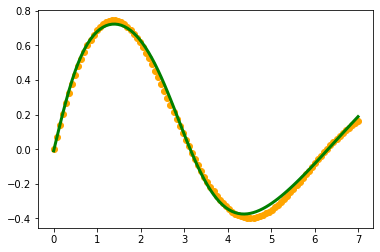

In [177]:
pred = net(x)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), pred.data.numpy(), 'g-', lw=3)

tensor(0.0687, grad_fn=<MseLossBackward0>)


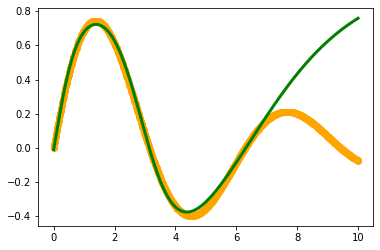

In [178]:
x = torch.unsqueeze(torch.linspace(0, 10, 800), dim=1) #OUT OF T
y = torch.exp(-x/5)*torch.sin(x)
pred = net(x)
loss = loss_func(pred, y)
print(loss)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), pred.data.numpy(), 'g-', lw=3)

In [160]:
#analyticaly the neural network and the derivatives 

In [179]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

def sigmoid_grad(x):
  return sigmoid(x)*(1- sigmoid(x))

def sigmoid_grad_grad(x):
  return sigmoid_grad(x) -2*sigmoid(x)*sigmoid_grad(x)

def neural_network(x,weights,bias):
    s_z = sigmoid(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z, weights[1]) + bias[1]
# first derivative of net
def dN_dx(weights, x):
    s_z_grad = sigmoid_grad(torch.matmul(x,weights[0])+bias[0]) 
    mul=torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [180]:
#second derivative
def d_dN_dx(weights,x):
  s_z_grad = sigmoid_grad_grad(torch.matmul(x,weights[0])+bias[0])
  mul=torch.mul((weights[0].T)**2,weights[1])
  return torch.matmul(s_z_grad,mul)

In [181]:
def error(pred,target): return ((pred-target)**2).mean() 

In [182]:
#initialize weights and biases
weights = [torch.randn((1,10),  requires_grad=True), torch.randn((10,1),  requires_grad=True)]
bias = [torch.randn(10,  requires_grad=True), torch.randn(1,  requires_grad=True)]

In [183]:
x = torch.unsqueeze(torch.linspace(0, 7, 100), dim=1) 
y = torch.exp(-x/5)*torch.sin(x)

In [229]:
epochs=2000
lr=0.01
for i in range(epochs):
    pred = neural_network(x,weights,bias)
    loss = error(pred,y)
    loss.backward()
    weights[0].data -= lr*weights[0].grad.data
    weights[1].data -= lr*weights[1].grad.data
    bias[0].data -= lr*bias[0].grad.data
    bias[1].data -= lr*bias[1].grad.data

 
    weights[0].grad.zero_()
    weights[1].grad.zero_()
    bias[0].grad.zero_()
    bias[1].grad.zero_()

    print("Loss: ", loss.item())

Loss:  0.0004062132502440363
Loss:  0.0004061965737491846
Loss:  0.00040618059574626386
Loss:  0.0004061659565195441
Loss:  0.00040615047328174114
Loss:  0.0004061344370711595
Loss:  0.0004061180225107819
Loss:  0.0004061021900270134
Loss:  0.0004060862120240927
Loss:  0.0004060687788296491
Loss:  0.0004060538485646248
Loss:  0.0004060383071191609
Loss:  0.00040602326043881476
Loss:  0.00040600565262138844
Loss:  0.0004059903440065682
Loss:  0.00040597430779598653
Loss:  0.0004059580387547612
Loss:  0.00040594450547359884
Loss:  0.0004059258208144456
Loss:  0.0004059110942762345
Loss:  0.00040589433046989143
Loss:  0.00040587931289337575
Loss:  0.0004058642080053687
Loss:  0.0004058468621224165
Loss:  0.00040583196096122265
Loss:  0.0004058163322042674
Loss:  0.0004058011109009385
Loss:  0.00040578292100690305
Loss:  0.0004057682235725224
Loss:  0.0004057527403347194
Loss:  0.00040573684964329004
Loss:  0.00040571962017565966
Loss:  0.0004057043115608394
Loss:  0.00040568847907707095
L

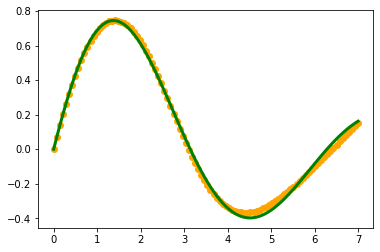

In [230]:
N=neural_network(x,weights,bias)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),N.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), y.data.numpy(), 'g-', lw=3)

Suppose $$P(t) \approx N(t)$$ and $$ \frac{dN^{2}}{dt^{2}}=net*net1 + net2$$ with loss function $$ L = \frac{dN^{2}}{dt^{2}} - net*net1 - net2$$

In [ ]:
#second approach

In [231]:
x = torch.unsqueeze(torch.linspace(0, 7, 1000), dim=1) 

In [232]:
net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )

In [249]:
def loss(x):

    x.requires_grad = True
    #N = net(x)
    N = neural_network(x, weights, bias)
    dN_x_x = d_dN_dx(weights,x)

    #dN_dx = torch.autograd.grad(N, x, grad_outputs=torch.ones_like(N),create_graph=True)[0]
    #dN_x_x = torch.autograd.grad(dN_dx, x, grad_outputs=torch.ones_like(dN_dx),create_graph=True )[0]

    return  torch.mean( ( dN_x_x - net1(x)*N)  ** 2)

In [248]:
optimizer = torch.optim.Adam(net1.parameters(), lr=0.001)

In [245]:
def closure():
    
    l = loss(x)
    losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(3):
    optimizer.step(closure)

loss: 0.005150384735316038
loss: 0.00515004713088274
loss: 0.005149708595126867


In [ ]:
#Train net2

In [246]:
net2 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )

In [250]:
def loss_net2(x):

    x.requires_grad = True
    #N = net(x)
    N = neural_network(x, weights, bias)
    dN_x_x = d_dN_dx(weights,x)

    #dN_dx = torch.autograd.grad(N, x, grad_outputs=torch.ones_like(N),create_graph=True)[0]
    #dN_x_x = torch.autograd.grad(dN_dx, x, grad_outputs=torch.ones_like(dN_dx),create_graph=True )[0]

    return  torch.mean( ( dN_x_x - net1(x)*N -net2(x))  ** 2)

In [251]:
optimizer = torch.optim.Adam(net2.parameters(), lr=0.001)

In [290]:
def closure():
    
    l = loss_net2(x)
    losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(4):
    optimizer.step(closure)

loss: 0.0004602171538863331
loss: 0.0004602171538863331
loss: 0.0004602171538863331
loss: 0.0004602171538863331


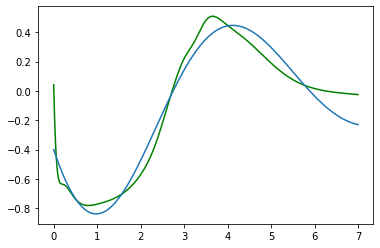

In [291]:
#check the ode 
x = torch.Tensor(np.linspace(0, 7, 1000)[:, None]) 
y=torch.exp(-(x/5))*torch.sin(x)
dy = torch.exp(-(x/5))*(-1/5)*torch.sin(x) + torch.exp(-(x/5))*torch.cos(x)
ddy = -(1/5)*dy - y -(1/5)*torch.exp(-(x/5))*torch.cos(x)
pred = net(x)*net1(x) +net2(x)
plt.plot(x.data.numpy(), pred.data.numpy(), 'g-')
plt.plot(x.data.numpy(), ddy.data.numpy())

In [292]:
#solution of ode 
NN = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1))
#A = net(x[0])
Psi_t = lambda x: x + x**2 * NN(x) #NN is responsible for the solution of O.D.E
f = lambda x: net1(x)*net(x) #they are both trained. 

In [293]:
def loss_fun(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x),
                                            create_graph=True )[0]

    return  torch.mean( ( Psi_t_x_x - f(x) )  ** 2)

In [294]:
optimizer = torch.optim.Adam(NN.parameters(), lr=0.01)

In [297]:
def closure():

    optimizer.zero_grad()
    l = loss_fun(x)
    print(l)
    #l.backward()
    l.backward(retain_graph=True)
    return l

for i in range(5):
    optimizer.step(closure)

tensor(0.0040, grad_fn=<MeanBackward0>)
tensor(0.0040, grad_fn=<MeanBackward0>)
tensor(0.0040, grad_fn=<MeanBackward0>)
tensor(0.0039, grad_fn=<MeanBackward0>)
tensor(0.0039, grad_fn=<MeanBackward0>)


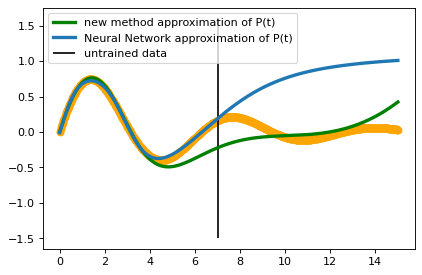

In [302]:
x = torch.unsqueeze(torch.linspace(0, 15, 800), dim=1) 
y = torch.exp(-x/5)*torch.sin(x)
p_t_second = Psi_t(x)
p_t_first = net(x)
fig, ax = plt.subplots(dpi=80)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', lw=3, label ='new method approximation of P(t)')
ax.plot(x.data.numpy(), p_t_first.data.numpy(), lw=3, label ='Neural Network approximation of P(t)')

ax.vlines(x=7, ymin=-1.5, ymax=1.6, color='black', label='untrained data')


#ax.plot(x.data.numpy(), yrk, lw=3, label ='RK approximation of P(t)')

plt.legend(loc='best');